In [5]:
# Imports PIL module 
import PIL 
from PIL import ImageFont, ImageDraw, Image
  
# creating a image object (new image object) with 
# RGB mode and size 200x200 

width = 32
im = PIL.Image.new(mode = "L", size = (width, width),color='white')

draw = ImageDraw.Draw(im)

fontsize = 32
font = ImageFont.truetype("/home/data/japanese/Fonts/epmarugo.ttf", fontsize)
char ="龜"

x = (width - fontsize)/2
draw.text((x, x), char, font=font)


In [37]:
def FontImg(size,font,char):

    im = PIL.Image.new(mode = "L", size = (size, size),color='white')

    draw = ImageDraw.Draw(im)


    x = (width - size)/2
    draw.text((x, x), char, font=font)
    
    return im

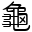

In [6]:


im

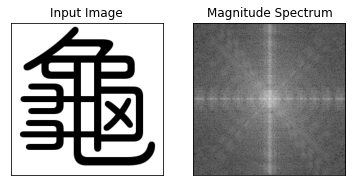

In [39]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

img=im

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
import pickle
available = pickle.load( open( "/home/pomelo/perspectiveTransform/charactersAvailable.p", "rb" ) )

In [12]:
epm=available['epmarugo.ttf']

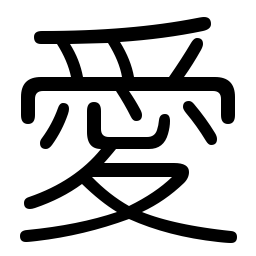

In [13]:

FontImg(256,font,char)

In [14]:
img = np.array(im)

In [15]:
import pandas as pd

In [16]:
from tqdm import tqdm

chars = pd.DataFrame([])

for char in tqdm(epm):
    img = FontImg(256,font,char)
    img = np.array(img)
    char = pd.Series(img.flatten(),name=char)
    chars = chars.append(char)

100%|██████████| 6533/6533 [37:32<00:00,  2.90it/s]


In [22]:
chars

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
ぁ,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
あ,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
ぃ,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
い,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
ぅ,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
龍,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
龕,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
龜,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
龝,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


In [28]:
mean=chars.mean()
mean=np.array(mean)
m=mean.reshape((256,256))

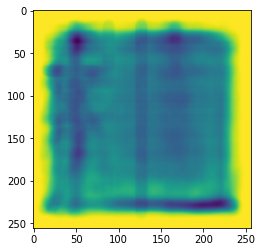

In [31]:
plt.imshow(m)